## Research Work

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import re
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet as wn
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
data_train = pd.read_json('../../Dataset/Random Acts Of Pizza/train.json')
data_train['data_type'] = 'train'
y = data_train.pop('requester_received_pizza')
data_train.head(2)

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,...,[],0,1,0,1,None,nickylvst,1317852607,1317849007,train
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,...,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824,train


In [6]:
data_test = pd.read_json('../../Dataset/Random Acts Of Pizza/test.json')
data_test['data_type'] = 'test'
data_test.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,t3_i8iy4,Hey all! It's about 95 degrees here and our ki...,[request] pregger gf 95 degree house and no fo...,42.083866,0.0,57,0,10,0,16,"[AskReddit, COents, Denver, DenverBroncos, Lib...",364,840,j_like,1308963419,1308959819,test
1,N/A,t3_1mfqi0,I didn't know a place like this exists! \n\nI ...,"[Request] Lost my job day after labour day, st...",223.784537,0.0,145,0,36,0,29,"[Android, AskReddit, GrandTheftAutoV, IAmA, Mi...",516,1448,0110110101101100,1379263523,1379259923,test


In [7]:
not_present = []
for i in data_train.columns:
    if i not in data_test.columns:
        not_present.append(i)
data_train.drop(labels=not_present,axis=1,inplace=True)

In [8]:
## Combining the training and testing data

data = pd.concat([data_train,data_test])
data_copy = data.copy()
data.shape

(5671, 18)

In [9]:
data.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train


In [10]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 20

def applyNMF(data_samples):
    print("Extracting tf-idf features for NMF...")
    tfidf_vectorizer = TfidfVectorizer(max_df=1.0,min_df=1,stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data_samples)
    print("Fitting the NMF model with tf-idf features,"
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
    nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
    return nmf.transform(tfidf)

In [11]:
topics = applyNMF(data['request_text_edit_aware'])
print(topics.shape)

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
(5671, 20)


In [12]:
topics_vec = np.argmax(topics,axis=1)

In [13]:
data['topics'] = topics_vec
data['topics'].head()

0     2
1    14
2     0
3     3
4     4
Name: topics, dtype: int64

In [14]:
## Finding the nature of the topics generated
from collections import Counter
imp_topics = Counter(topics_vec).most_common(10)
print imp_topics

[(0, 1885), (18, 360), (11, 303), (1, 274), (5, 236), (6, 209), (19, 204), (4, 197), (17, 194), (8, 181)]


In [15]:
def find_topic(topic,remove_verbs=True):
    requests = data_copy[data['topics'] == imp_topics[topic][0]]['request_text_edit_aware']
    chain_requests = ''
    for request in requests:
        chain_requests += ('. '+request)
    chain_requests = re.sub('^[a-zA-Z]',' ',chain_requests)
    words = [word for word in chain_requests.split() if word not in stopwords.words("english")]
    if remove_verbs:
        words = [word for word in words if word in nouns]
    return Counter(words).most_common(100)

In [16]:
topic_words = []
for i in range(len(imp_topics)):
    words = find_topic(i)
    words = ' '.join([word[0] for word in words])
    topic_words.append(words)

In [17]:
train = data[data['data_type'] == 'train']
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train,2
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train,14


In [25]:
y = y.map({'False':0,'True':1})

In [26]:
train['received'] = y
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,[],0.0,0.0,nickylvst,1.317853e+09,1.317849e+09,train,2.0,False
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0.0,0.0,15.0,0.0,12.0,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34.0,116.0,fohacidal,1.332652e+09,1.332649e+09,train,14.0,False


In [33]:
topic_df = []
for i in range(len(imp_topics)):
    topic_df.append([imp_topics[i][0],topic_words[i],100*float(train[train['topics'] == imp_topics[i][0]]['received'].sum())\
                     /len(train[train['topics'] == imp_topics[i][0]]['received'])])

In [34]:
topic_df = pd.DataFrame(topic_df,columns = ['Topic','Words','Success Rate'])
topic_df

,Topic,Words,Success Rate
0,0,pizza get like money know work time last one g...,26.206385
1,18,job get pizza last money food first week back ...,26.819923
2,11,pizza get like money last know food love one r...,35.874439
3,1,forward get pizza money love last back promise...,30.303030
4,5,food money get pizza last house little back go...,19.875776
5,6,pizza tonight get love food like dinner one to...,22.516556
6,19,college student pizza get money love last much...,24.489796
7,4,love pizza get money work right back much go d...,11.510791
8,17,pizza use right money get food much like go la...,22.656250
9,8,get pizza forward money food friday last back ...,22.400000


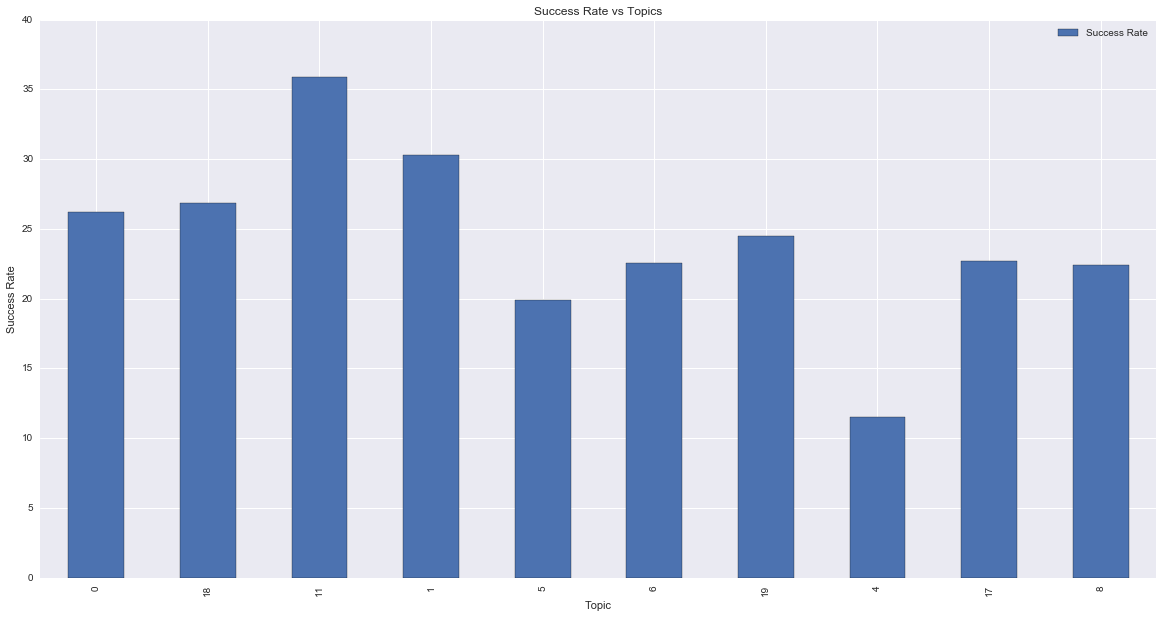

In [48]:
topic_df.plot(kind='bar',y='Success Rate',x='Topic')
plt.xlabel('Topic')
plt.ylabel('Success Rate')
plt.title('Success Rate vs Topics')
plt.show()

In [60]:
## Success correlation with the length of request
train.dropna(inplace=True,axis=0)
train.tail(1)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received
4039,N/A,t3_189pw1,"Like the title says, had to pay an unexpected ...","[Request] USA WA. Unexpected bill, couldn't go...",572.314942,0.0,523.0,0.0,20.0,0.0,28.0,"[AskReddit, Drugs, IAmA, LongDistance, Minecra...",3212.0,8424.0,Ellebean,1.360535e+09,1.360535e+09,train,8.0,False


In [98]:
train['request_length'] = [len(x.split()) for x in train['request_text_edit_aware']]
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received,request_length
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0.0,0.0,0.0,0.0,...,[],0.0,0.0,nickylvst,1.317853e+09,1.317849e+09,train,2.0,False,67
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0.0,0.0,15.0,0.0,...,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34.0,116.0,fohacidal,1.332652e+09,1.332649e+09,train,14.0,False,16


In [145]:
length = []
def length_success(topic):    
    max_length = train[train['topics'] == topic]['request_length'].max()
    min_length = train[train['topics'] == topic]['request_length'].min()
    bin_size = (max_length - min_length)/10
    for i in range(10):
        df_one = df[(df['request_length'] >= min_length) & (df['request_length'] < min_length+bin_size)]
        df_new = df_one[df_one['received'] == True]
        if(len(df_one) == 0):
            df_one = ['a']
        length.append([topic,min_length,min_length+bin_size,float(len(df_new))/len(df_one)])
        min_length = min_length + bin_size

In [146]:
for topic in imp_topics:
    print 'Calculating length probabilities for {} topic..'.format(topic[0])
    length_success(topic[0])

Calculating length probabilities for 0 topic..
Calculating length probabilities for 18 topic..
Calculating length probabilities for 11 topic..
Calculating length probabilities for 1 topic..
Calculating length probabilities for 5 topic..
Calculating length probabilities for 6 topic..
Calculating length probabilities for 19 topic..
Calculating length probabilities for 4 topic..
Calculating length probabilities for 17 topic..
Calculating length probabilities for 8 topic..


In [150]:
df_length = pd.DataFrame(length,columns=['Topic','Lower Bound','Upper Bound','Probability Success'])
df_length.head(5)

,Topic,Lower Bound,Upper Bound,Probability Success
0,0,0,85,0.208333
1,0,85,170,0.311436
2,0,170,255,0.318750
3,0,255,340,0.431818
4,0,340,425,0.263158


In [151]:
df_length.to_csv('LengthCorrelation.csv',sep=',',columns=df_length.columns)